# Hand written digits recognition with neural networks using Keras library
## Introduction
+ The following packages need to be installed:
 + The python packages `keras`, `tensorflow`, `numpy` and `matplotlib`.
 + Jupyter notebook


## Preliminary
+ Importing necessary modules : The cell underneath needs to be run before others to import modules.

In [1]:
import keras
from keras.utils        import np_utils
from keras.models       import Sequential
from keras.layers       import Dense, Conv2D, MaxPooling2D, Activation, Dropout, Flatten, BatchNormalization
from keras.datasets     import mnist
from keras.optimizers   import Adam, Adadelta
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import random

Using TensorFlow backend.


+ Useful functions to reshape the input and watch failed predictions from a model.

In [2]:
def get_input_1D():
    # read data from dataset
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_test_original = x_test
    
    # reshape x in 1D
    x_train = x_train.reshape(x_train.shape[0], 784)
    x_test = x_test.reshape(x_test.shape[0], 784)

    # cast x to float32 and normalize to [0,1]
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255

    # reshape y to 10-dim bit instead of int
    y_test_original = y_test
    y_train = np_utils.to_categorical(y_train, 10)
    y_test = np_utils.to_categorical(y_test, 10)

    return x_train, y_train, x_test, y_test
    
    
def get_input_2D():
    # read data from dataset
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    # reshape in 2D, 28*28
    x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

    #convert to float and normalize
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255

    # reshape y to 10-dim bit instead of int
    y_train = np_utils.to_categorical(y_train, 10)
    y_test = np_utils.to_categorical(y_test, 10)

    return x_train, y_train, x_test, y_test


def show_failed_cases(model, x_test, y_test, nb_to_show = 20):
    l_1 = model.predict_classes(x_test)
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    l_2 = y_test
    ll = [i for i in range(len(l_1)) if l_1[i] != l_2[i] ]
    failed_sample = [ll[i] for i in random.sample(range(len(ll)), nb_to_show)]
    
    x_test = x_test.reshape(x_test.shape[0], 28, 28)
    for fail in failed_sample:
        plt.figure(fail)
        img = x_test[fail]
        print("real value is %s ; predicted value is %s" % (y_test[fail], l_1[fail]))
        plt.imshow(img)
        plt.show()

def show_history(history):
    #  "Accuracy"
    plt.figure(1)
    plt.plot(history.history['acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    #plt.legend(['train', 'validation'], loc='upper left')
    #plt.show()
    # "Loss"
    plt.figure(2)
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    #plt.legend(['train', 'validation'], loc='upper left')
    #plt.show()

## A first neural network : The multi-layer perceptron
+ This first example uses only Dense (fully connected) layers.

Influence of number of dense layers :
With 1 hidden layers
_________________________________
Epoch 1/4
60000/60000 [==============================] - 11s 191us/step - loss: 0.2215 - acc: 0.9334
Epoch 2/4
60000/60000 [==============================] - 10s 162us/step - loss: 0.0967 - acc: 0.9700
Epoch 3/4
60000/60000 [==============================] - 9s 158us/step - loss: 0.0768 - acc: 0.9753
Epoch 4/4
10000/10000 [==============================] - 1s 58us/step
[0.09126905857939273, 0.9714]
__________________________________

With 2 hidden layers
_________________________________
Epoch 1/4
60000/60000 [==============================] - 14s 241us/step - loss: 0.2663 - acc: 0.9183
Epoch 2/4
60000/60000 [==============================] - 14s 233us/step - loss: 0.1306 - acc: 0.9595
Epoch 3/4
60000/60000 [==============================] - 15s 245us/step - loss: 0.1059 - acc: 0.9667
Epoch 4/4
10000/10000 [==============================] - 1s 81us/step
[0.0890251682728529, 0.9733]
____________

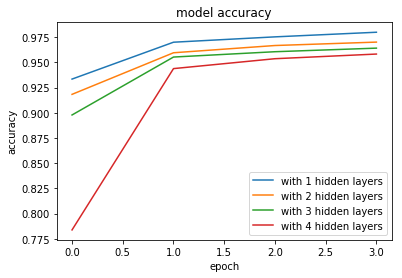

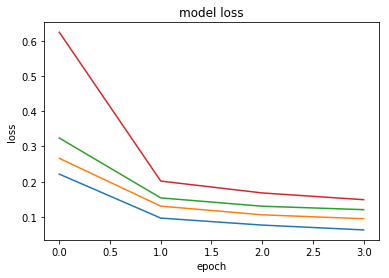

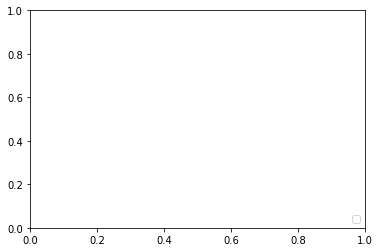



Influence of layer size
_________________________________
Layer size : 16

Epoch 1/6
60000/60000 [==============================] - 4s 64us/step - loss: 0.4048 - acc: 0.8915
Epoch 2/6
60000/60000 [==============================] - 4s 60us/step - loss: 0.2414 - acc: 0.9296
Epoch 3/6
60000/60000 [==============================] - 3s 56us/step - loss: 0.2159 - acc: 0.9370
Epoch 4/6
60000/60000 [==============================] - 4s 63us/step - loss: 0.1980 - acc: 0.9409
Epoch 5/6
60000/60000 [==============================] - 3s 58us/step - loss: 0.1884 - acc: 0.9440
Epoch 6/6
10000/10000 [==============================] - 0s 43us/step
[0.20534175412654876, 0.94]
__________________________________

_________________________________
Layer size : 32

Epoch 1/6
60000/60000 [==============================] - 5s 75us/step - loss: 0.3008 - acc: 0.9157
Epoch 2/6
60000/60000 [==============================] - 4s 66us/step - loss: 0.1630 - acc: 0.9525
Epoch 3/6
60000/60000 [======================

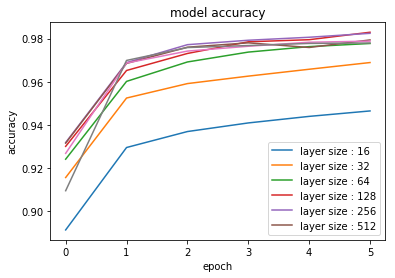

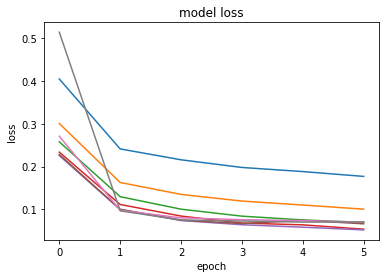

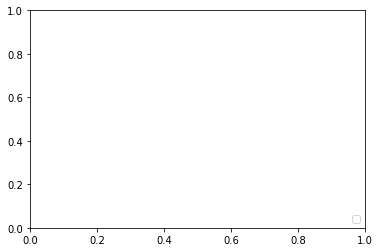

Influence of number of epochs
Epoch 1/80
60000/60000 [==============================] - 11s 190us/step - loss: 0.2464 - acc: 0.9241
Epoch 2/80
60000/60000 [==============================] - 10s 169us/step - loss: 0.1269 - acc: 0.9607
Epoch 3/80
60000/60000 [==============================] - 10s 168us/step - loss: 0.1030 - acc: 0.9680
Epoch 4/80
60000/60000 [==============================] - 11s 178us/step - loss: 0.0955 - acc: 0.9703
Epoch 5/80
60000/60000 [==============================] - 11s 181us/step - loss: 0.0885 - acc: 0.9722
Epoch 6/80
60000/60000 [==============================] - 10s 167us/step - loss: 0.0797 - acc: 0.9746
Epoch 7/80
60000/60000 [==============================] - 11s 176us/step - loss: 0.0778 - acc: 0.9755
Epoch 8/80
60000/60000 [==============================] - 11s 181us/step - loss: 0.0771 - acc: 0.9752
Epoch 9/80
60000/60000 [==============================] - 10s 169us/step - loss: 0.0718 - acc: 0.9775
Epoch 10/80
60000/60000 [===========================

10000/10000 [==============================] - 1s 98us/step


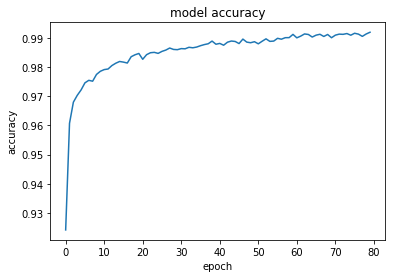

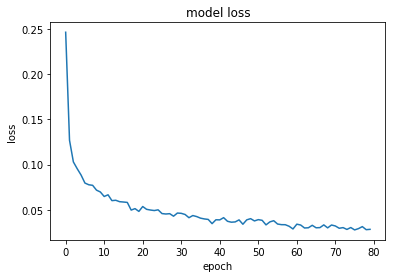

[0.11513492659934027, 0.9813]


In [6]:
def add_dense_layers(model, dense_layers_sizes, drop_out=None):
    model = Sequential()
    model.add(Dense(dense_layers_sizes[0], input_dim=784, activation='sigmoid'))
    
    for size in dense_layers_sizes[1:]:
        if drop_out:
            model.add(Dropout(drop_out))
        model.add(Dense(size, activation='sigmoid'))
    return model

# Influence of number of layers:
print("Influence of number of dense layers :")
x_train, y_train, x_test, y_test = get_input_1D()
layers = [256]
for i in range(4):
    print("With %s hidden layers\n_________________________________" % (i+1))
    drop_out = 0.2
    model = Sequential()
    model = add_dense_layers(model, layers, drop_out)
    model.add(Dense(10, activation='softmax'))
    opt=Adam(lr=0.01)
    model.compile(loss = 'categorical_crossentropy',
                 optimizer = opt,
                 metrics = ['accuracy'])

    hist = model.fit(x_train, y_train,
             epochs = 4,
             batch_size = 64)
    
    show_history(hist)
    layers += [256]
    score = model.evaluate(x_test, y_test, batch_size = 64)
    print(score)
    print("__________________________________\n")
plt.figure(1)
plt.legend(["with %s hidden layers" % (i+1) for i in range(6)], loc=4)
plt.show()
plt.figure(2)
plt.legend(["with %s hidden layers" % (i+1) for i in range(6)], loc=4)
plt.show()

# influence of layer size :
print("\n\nInfluence of layer size")
x_train, y_train, x_test, y_test = get_input_1D()
layers = [16]
for i in range(8):
    print("_________________________________\nLayer size : %s\n" % (16*2**i))
    drop_out = 0.2
    model = Sequential()
    model = add_dense_layers(model, layers, drop_out)
    model.add(Dense(10, activation='softmax'))
    opt=Adam(lr=0.01)
    model.compile(loss = 'categorical_crossentropy',
                 optimizer = opt,
                 metrics = ['accuracy'])

    hist = model.fit(x_train, y_train,
             epochs = 6,
             batch_size = 64)
    
    show_history(hist)
    layers = [2*layers[0]]
    score = model.evaluate(x_test, y_test, batch_size = 64)
    print(score)
    print("__________________________________\n")
plt.figure(1)
plt.legend(["layer size : %s" % (16*2**i) for i in range(6)], loc=4)
plt.show()
plt.figure(2)
plt.legend(["layer size :%s" % (16*2**i) for i in range(6)], loc=4)

plt.show()



#influence of number of epochs
print("Influence of number of epochs")
x_train, y_train, x_test, y_test = get_input_1D()
for i in range(80):
model = Sequential()
    model.add(Dense(256, input_dim=784, activation='sigmoid'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    opt=Adam(lr=0.01)
    model.compile(loss = 'categorical_crossentropy',
                 optimizer = opt,
                 metrics = ['accuracy'])

    hist = model.fit(x_train, y_train,
             epochs = 80,
             batch_size = 64)

    show_history(hist)
    acc, loss = model.evaluate(x_test, y_test, batch_size = 64)
    score_acc += [acc]
    score_loss += [loss]
    print(score)
plt.plot(score_acc)
plt.show()
plt.plot(loss_acc)
plt.show()

#show_failed_cases(model, x_test, y_test)


### What can be learned from this simple NN ?
We tried to play on different hyperparameters to get the habit to tune networks.


+ Number of dense layers :
    + The first 2 or 3 dense layers do play an important part, but after, adding many layers do not really improve the prediction quality of the model, and has a big cost for the performance. Actually the best results are achieved with the smallest NN, made of only 1 hidden layer.
    + It is interesting to see that if the NN is given too many dense layers, with random values to start with, it cannot "learn" anymore and keep predicting at a very low success rate (about 10%, as good as a random predictor). So it looks that too many layers, with no network structure, does not improve at all the model but diminishes its quality.
    
    
+ Size of dense layers :
    + Playing with dense layer size does also have an influence on the results, here is a plot giving results according to different dense layer sizes.
    
    
+ Number of epochs : 
    + The NN does learn a bit during each epoch ; but this has limits as well, since we can see that a very high number of epochs does not improve the overall results or diminish the overall losses. We can clearly see that on this graph, where after a dozen epochs the NN stops improving and reaches some kind of limit.
    
    
+ Dropout influence :
    + Including dropout layers will prevent overfitting, this feature is really an important one. For a NN to be well trained without any dropout, we obtain better results on the training samples than on the test samples, and vice versa when dropout is enabled. 
    + That's why all Dense layers will be added to the model along with a dropout layer to prevent overfitting.

Attempt using convolutionnal NN

In [ ]:
# read data from dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# reshape in 2D, 28*28
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

#convert to float and normalize
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# reshape y to 10-dim bit instead of int
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

model = Sequential()
 
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Dense(100, activation='sigmoid'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

opt = Adam(lr = 0.01)
model.compile(loss = 'categorical_crossentropy',
             optimizer = opt,
             metrics = ['accuracy'])
model.fit(x_train, y_train,
         epochs = 8,
         batch_size = 32)
score = model.evaluate(x_test, y_test, batch_size = 32)
print(score)

Now let's improve it by adding some data augmentation

In [ ]:
# read data from dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# reshape in 2D, 28*28
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

#convert to float and normalize
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# reshape y to 10-dim bit instead of int
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)



gen = ImageDataGenerator(rotation_range=11, width_shift_range=0.14, shear_range=0.25,
                         height_shift_range=0.14, zoom_range=0.12)

test_gen = ImageDataGenerator()

train_generator = gen.flow(x_train, y_train, batch_size=64)
test_generator = test_gen.flow(x_test, y_test, batch_size=64)


model = Sequential()
 
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Dense(100, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

opt = Adam(lr = 0.01)
model.compile(loss = 'categorical_crossentropy',
             optimizer = opt,
             metrics = ['accuracy'])
model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=5, 
                    validation_data=test_generator, validation_steps=10000//64)
score = model.evaluate(x_test, y_test, batch_size = 64)
print(score)

Adding more conv2D layers, with more filters to improve results.

In [ ]:
# read data from dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# reshape in 2D, 28*28
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

#convert to float and normalize
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# reshape y to 10-dim bit instead of int
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)



gen = ImageDataGenerator(rotation_range=11, width_shift_range=0.14, shear_range=0.25,
                         height_shift_range=0.14, zoom_range=0.12)

test_gen = ImageDataGenerator()

train_generator = gen.flow(x_train, y_train, batch_size=64)
test_generator = test_gen.flow(x_test, y_test, batch_size=64)


model = Sequential()
 
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
#model.add(BatchNormalization(axis=-1))
#model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(BatchNormalization(axis=-1))
#model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
#model.add(BatchNormalization())
#model.add(Dense(24, activation='relu'))
model.add(Dense(10, activation='softmax'))

#opt = Adam(lr = 0.015)
opt = Adadelta()
model.compile(loss = 'categorical_crossentropy',
             optimizer = opt,
             metrics = ['accuracy'])
model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=10, 
                    validation_data=test_generator, validation_steps=10000//64)
score = model.evaluate(x_test, y_test, batch_size = 64)
print(score)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
print("here")

failed = np.nonzero(model.predict_classes(x_test).reshape((-1,)) != np.nonzero(y_test))

print(failed)
for fail in failed[:25]:
    img = x_test[fail].reshape(28, 28)
    plt.imshow(img)
    print("predicted %s ; real value is %s" % (model.predict_classes(x_test[fail]), y_test[fail]))
    plt.show()

In [ ]:
print(hello)